# Reinforcement Learning in Path Finding

Traditional shortest path algorithm including BFS(Breadth First Search), DFS(Depth First Search) and Dijkstra's algorithm.

However, BFS and DFS is very slow and suffer exponential time increase as graph tree become deeper and deeper for large complex graph. For my experience, when I have 70k nodes and 200K edge graph, BFS and DFS would take hours to search 5 depth. So it is impossible if the shortest path is 6 depth or more.

<img src='p1.png'>

<img src='P2.png'>

For Dijkstra's algorithm, it is quick to give a shortest path, but it will give only one not all of the best path. For instance, if there are 100 equal best rountes in a weighted graph, Dijskra's algorithm will only return one of the best rountes. 

So I develop a algorithm using reinforcemenet learning in path finding problem. In reinforcemnt learning problem, we have action, rewards and states and discount rate. To solve traditional problem, we have Q-learning. Q-learning can be used to find an optimal action-selection policy for any given (finite) Markov decision process (MDP). Similarly, to solve best-path-finding problem, we have Q-rounting. The difference between Q-Learning and Q-Rounting is that, Q-Rounting doesn't have a discount rate, and for each state, it will choose the minimun furture cost instead of maximum future reward.

<img src='p3.png'>
<img src='p4.png'>

The python code for Q-Rounting:
```python
def update_Q(T,Q,current_state, next_state, alpha):
    current_t = T[current_state][next_state]
    current_q = Q[current_state][next_state]
    new_q = current_q + alpha * (current_t + min(Q[next_state].values()) - current_q)
    Q[current_state][next_state] = new_q   
    return Q
```

Here we take a small network for instance.
<img src='p5.png'>
We use number 1 to 9  to repalce node A to I. And we want to find shortest path from 1(A) to 9(I).

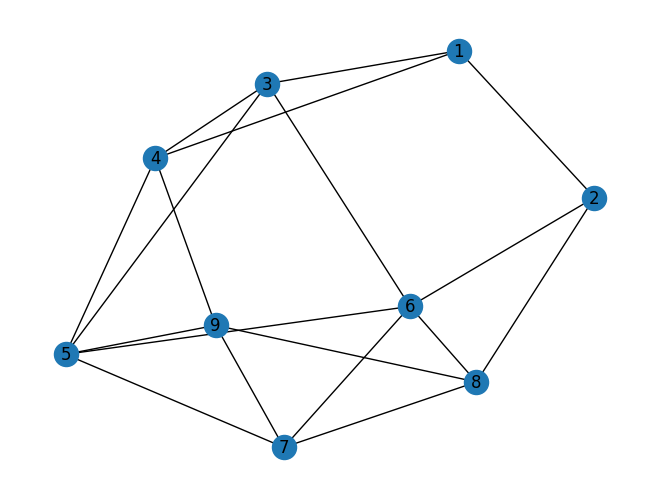

Q : {1: {2: 100, 3: 100, 4: 100}, 2: {8: 100, 1: 100, 6: 100}, 3: {4: 100, 6: 100, 1: 100, 5: 100}, 4: {5: 100, 9: 100, 1: 100, 3: 100}, 5: {3: 100, 6: 100, 7: 100, 9: 100, 4: 100}, 6: {2: 100, 8: 100, 3: 100, 5: 100, 7: 100}, 7: {6: 100, 8: 100, 9: 100, 5: 100}, 8: {2: 100, 6: 100, 7: 100, 9: 100}, 9: {8: 100, 4: 100, 5: 100, 7: 100}} | R : {1: {2: 15, 3: 13, 4: 5}, 2: {8: 11, 1: 15, 6: 8}, 3: {4: 18, 6: 6, 1: 13, 5: 3}, 4: {5: 4, 9: 18, 1: 5, 3: 18}, 5: {3: 3, 6: 1, 7: 9, 9: 14, 4: 4}, 6: {2: 8, 8: 17, 3: 6, 5: 1, 7: 16}, 7: {6: 16, 8: 7, 9: 10, 5: 9}, 8: {2: 11, 6: 17, 7: 7, 9: 12}, 9: {8: 12, 4: 18, 5: 14, 7: 10}}
0
loop: 0
Valid : [2, 3, 4]
best_action : 2
Valid pop  : [3, 4]
next_state  : 4
Q-update | current state : 1 | Q[current_state] : {2: 100, 3: 100, 4: 100} | next_state : 4 | Q[next_state] : {5: 100, 9: 100, 1: 100, 3: 100}
Valid : [5, 9, 1, 3]
best_action : 5
Q-update | current state : 4 | Q[current_state] : {5: 100, 9: 100, 1: 100, 3: 100} | next_state : 5 | Q[next_state

In [1]:
from get_dict import get_dict
from get_R_Q import initial_R
from get_R_Q import initial_Q
from get_result import get_result
import networkx as nx
import pandas as pd
import time
import matplotlib.pyplot as plt

data = pd.read_csv("graph_2.csv")
graph = get_dict(data)

A = graph["A"]
Z = graph["Z"]
weight = graph["weight"]
A_Z_dict = graph["A_Z_dict"]

G = nx.Graph()

for i in range(len(A)):
    G.add_edge(A[i], Z[i], weight=weight[i])
nx.draw(G, with_labels=True)
plt.show()
##
start = 1
end = [9]

R = initial_R(A, Z, weight,A_Z_dict)
Q = initial_Q(R)
print(f"Q : {Q} | R : {R}")

alpha = 0.7 # learning rate
epsilon = 0.1 #greedy policy
n_episodes = 10000

time0  = time.time()
result = get_result(R, Q, alpha, epsilon, n_episodes, start, end)
print("time is:", time.time() - time0)
print(result)

We can see it find the shortest is 1-4-5-9(A-D-E-I) and the cost for this rounte is 23.
Now we change the weight from 4(D) to 9(I) to 18. Now we expect it will finde another rount 1-4-9(A-D-I), since both route have cost 23.

In [2]:
from get_dict import get_dict
from get_R_Q import initial_R
from get_R_Q import initial_Q
from get_result import get_result

import pandas as pd
import time

data = pd.read_csv("graph_2.csv")
graph = get_dict(data)

A = graph["A"]
Z = graph["Z"]
weight = graph["weight"]
A_Z_dict = graph["A_Z_dict"]

##
start = 1
end = [9]

R = initial_R(A,Z,weight,A_Z_dict)
Q = initial_Q(R)

alpha = 0.7 # learning rate
epsilon = 0.1 #greedy policy
n_episodes = 10000

time0 = time.time()
result = get_result(R,Q,alpha,epsilon,n_episodes,start,end)
print("time is:",time.time() - time0)
print(result)

0
loop: 0
Valid : [2, 3, 4]
best_action : 3
Q-update | current state : 1 | Q[current_state] : {2: 100, 3: 100, 4: 100} | next_state : 3 | Q[next_state] : {4: 100, 6: 100, 1: 100, 5: 100}
Valid : [4, 6, 1, 5]
best_action : 1
Valid pop  : [4, 6, 5]
next_state  : 6
Q-update | current state : 3 | Q[current_state] : {4: 100, 6: 100, 1: 100, 5: 100} | next_state : 6 | Q[next_state] : {2: 100, 8: 100, 3: 100, 5: 100, 7: 100}
Valid : [2, 8, 3, 5, 7]
best_action : 3
Q-update | current state : 6 | Q[current_state] : {2: 100, 8: 100, 3: 100, 5: 100, 7: 100} | next_state : 3 | Q[next_state] : {4: 100, 6: 104.2, 1: 100, 5: 100}
Valid : [4, 6, 1, 5]
best_action : 1
Q-update | current state : 3 | Q[current_state] : {4: 100, 6: 104.2, 1: 100, 5: 100} | next_state : 1 | Q[next_state] : {2: 100, 3: 109.1, 4: 100}
Valid : [2, 3, 4]
best_action : 2
Valid pop  : [3, 4]
next_state  : 3
Q-update | current state : 1 | Q[current_state] : {2: 100, 3: 109.1, 4: 100} | next_state : 3 | Q[next_state] : {4: 100, 6:

Now we can see it find two routes have same smallest cost 23.

This is only a example of small network. For my experience, I tried on large complex network with 70k nodes and 20k edges and Q-routing algorithm is still fast and it can find all shortest path with 10 depth within minutes. 

You set your own graph in graph.csv. First column is stating node, second column is connecting node and third column is the cost between the two nodes.

Hope you have fun!! If you have any questions, please leave comments or e-mail to mathshiluyuan@gmail.com.